# Central limit theorem


This experiment visualises clasical Central limit theorem(CLT) for several random distributions. 

## Theorem

Let $\{ X_1, X_2, ..., X_n\}$ be a sequence of independet and identically distributed random variables with expected value $\mu$ and variance $\sigma^2$. Suppose $S_n := \frac{\sum^n_{i=1}X_i}{n} $. Than $\sqrt{n}(S_n - \mu)$ approximates the normal distribution with mean $0$ and variance $\sigma^2$ as $n$ gets larger.

In [8]:
# python libraries
%matplotlib inline
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [9]:
# choose distribution
disr_beta = sts.beta(1, 3)
# generate sequence
sample_beta = disr_beta.rvs(5000)

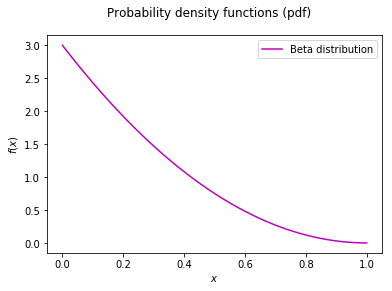

In [10]:
# Probability density functions(pdf)
x = np.linspace(0,1,100)
cdf = disr_beta.pdf(x)
plt.plot(x, cdf, label='Beta distribution', color = 'm')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.suptitle("Probability density functions (pdf)")
plt.show()

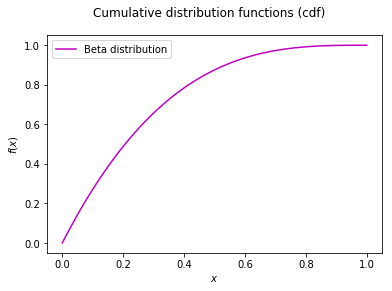

In [11]:
# Cumulative distribution function
x = np.linspace(0,1,100)
cdf = disr_beta.cdf(x)
plt.plot(x, cdf, label='Beta distribution', color = 'm')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.suptitle("Cumulative distribution functions (cdf)")
plt.show()

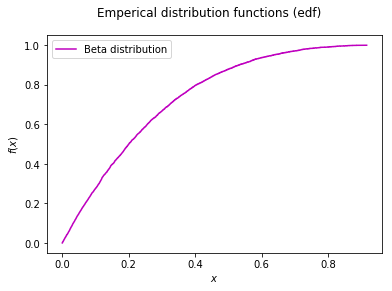

In [12]:
# Emperical distribution functions
ecdf = ECDF(sample_beta)
plt.step(ecdf.x, ecdf.y, label='Beta distribution', color ='m')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.suptitle("Emperical distribution functions (edf)")
plt.show()

As we see Emperical distribution functions coincide to relative Cumulative distribution functions. This means that our sample indeed has right distribution.

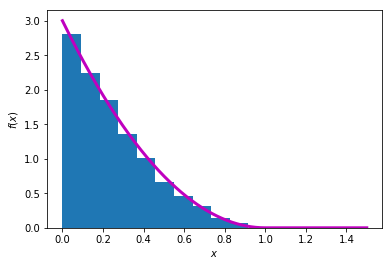

In [13]:
# we check that our random sample has about the same pdf
x = np.linspace(0, 1.5, 5000)
pdf = disr_beta.pdf(x)

plt.plot(x, pdf, linewidth = 3, color = 'm')
plt.hist(sample_beta, normed = True)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

Mean and variance of $\beta$-function a calculated this way.
Mean:
\begin{equation*}
E = 
\frac{\alpha}{\alpha +\beta }
\end{equation*}

Variance:
\begin{equation*}
\sigma^{2} = 
\frac{\alpha \beta }{(\alpha +\beta )^{2}(\alpha +\beta +1)}
\end{equation*}

Then $E = 0.26,  \sigma^{2} = 0.02$, 
finally we get

$N(EX, \frac{DX}{k}) = N(\frac{\alpha}{\alpha +\beta }, \sqrt{\frac{\alpha \beta }{(\alpha +\beta )^{2}(\alpha +\beta +1){k}}} )$

In [14]:
alpha_ = 2.0
beta_ = 5.0
def Draw(k):
    medium = [] 
    # вычисляем среднее
    for i in range(1000):
        medium.append(sts.beta(2, 5).rvs(k).mean())
    plt.hist(medium, normed=True, bins = k, label='sample means histogram', color= '#4dd0e1')
    # вычисляем параметры нормального распределения
    norm_rv = sts.norm(alpha_ /(alpha_  + beta_), np.sqrt((alpha_ * beta_)/((alpha_  + beta_)*(alpha_  + beta_ + 1.)*(alpha_  + beta_)*k)))
    x = np.linspace(0.2,0.4,100)
    pdf =  norm_rv.pdf(x)
    plt.plot(x, pdf, label='norm theoretical pdf', color = '#ea80fc')
    plt.legend()
    plt.title("n = %d" % k)
    plt.ylabel('$f(x)$')
    plt.xlabel(' $x$')
    plt.show()
    

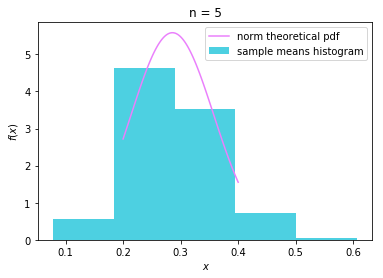

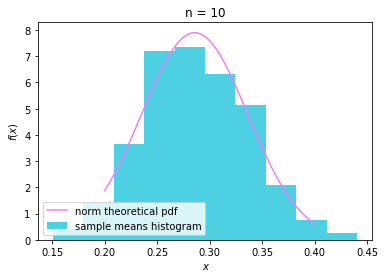

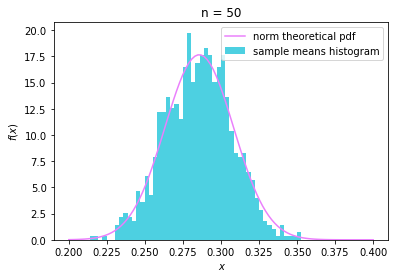

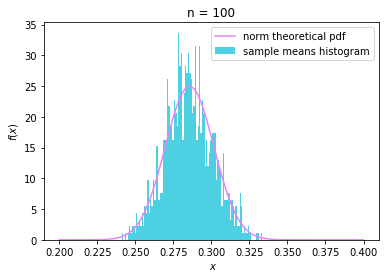

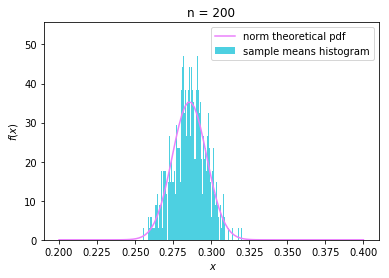

In [15]:
for k in [5, 10, 50, 100, 200]:
    Draw(k)

# Conclusion

With increase of size of the sequence, accuracy of appoximation rises and variance decreases.